Final Project 
======

Kaggle Competition 
-----

For this project I chose to do the active competition [San Francisco Crime Classification](https://www.kaggle.com/c/sf-crime/). I'll test out a number of different algorithms with test data, but this seems like probably RandomForest a Neural Network 2 levels deep will have the best results. I am interested in this type of analysis as it is data science that contributes to the common good.

#### Part 1 - Submit first (bad) try

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, scale
from sklearn.metrics import confusion_matrix

In [2]:
train_raw = pd.read_csv('Data/train.csv')
test_raw = pd.read_csv('Data/test.csv')
sample_submission = pd.read_csv('Data/sampleSubmission.csv')
print train_raw.shape

(878049, 9)


In [8]:
train_raw.head()

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,NORTHERN,NONE,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,PARK,NONE,100 Block of BRODERICK ST,-122.438738,37.771541


In [9]:
test_raw.head()

,Id,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432
2,2,2015-05-10 23:50:00,Sunday,NORTHERN,2000 Block of GOUGH ST,-122.426002,37.792212
3,3,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412
4,4,2015-05-10 23:45:00,Sunday,INGLESIDE,4700 Block of MISSION ST,-122.437394,37.721412


In [10]:
sample_submission.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [45]:
g = train_raw.groupby('Category')
g['Category'].agg(len)

Category
ARSON                            1513
ASSAULT                         76876
BAD CHECKS                        406
BRIBERY                           289
BURGLARY                        36755
DISORDERLY CONDUCT               4320
DRIVING UNDER THE INFLUENCE      2268
DRUG/NARCOTIC                   53971
DRUNKENNESS                      4280
EMBEZZLEMENT                     1166
EXTORTION                         256
FAMILY OFFENSES                   491
FORGERY/COUNTERFEITING          10609
FRAUD                           16679
GAMBLING                          146
KIDNAPPING                       2341
LARCENY/THEFT                  174900
LIQUOR LAWS                      1903
LOITERING                        1225
MISSING PERSON                  25989
NON-CRIMINAL                    92304
OTHER OFFENSES                 126182
PORNOGRAPHY/OBSCENE MAT            22
PROSTITUTION                     7484
RECOVERED VEHICLE                3138
ROBBERY                         23000
RUN

In [467]:
train_data\
,train_labels = train_raw[['DayOfWeek'\
                                     ,'PdDistrict'\
                                     ,'Address'\
                                     ,'X'\
                                     ,'Y']][2001:]\
                            ,train_raw['Category'][2001:]
dev_data\
,dev_labels = train_raw[['DayOfWeek'\
                                 ,'PdDistrict'\
                                 ,'Address'\
                                 ,'X'\
                                 ,'Y']][:1000]\
                            ,train_raw['Category'][:1000]
dev_test_data\
,dev_test_labels = train_raw[['DayOfWeek'\
                                 ,'PdDistrict'\
                                 ,'Address'\
                                 ,'X'\
                                 ,'Y']][1001:2000]\
                            ,train_raw['Category'][1001:2000]
test_data = test_raw[['DayOfWeek'\
                     ,'PdDistrict'\
                     ,'Address'\
                     ,'X'\
                     ,'Y']]

In [468]:
rf = RandomForestClassifier() #leaving with default settings for now

Data needs to be preprocessed for RF in sklearn

In [62]:
def recode(df):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    for i in range(df.shape[1]):
        t = df.iloc[:,i].dtype
        if t not in numerics:
            le = LabelEncoder()
            le.fit(df.iloc[:,i])
            df.iloc[:,i] = le.transform(df.iloc[:,i])
        else:
            df.iloc[:,i] = scale(df.iloc[:,i])
    return df

def recode_labels(df):
    le = LabelEncoder()
    le.fit(df)
    return le

In [470]:
dev_data = recode(dev_data)
dev_label_le = recode_labels(np.concatenate((dev_labels,dev_test_labels),axis=1))
dev_labels = dev_label_le.transform(dev_labels)
dev_test_data = recode(dev_test_data)
dev_test_labels = dev_label_le.transform(dev_test_labels)

Run model

In [472]:
rf.fit(dev_data,dev_labels)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

In [473]:
predictions = rf.predict(dev_test_data)

In [474]:
actual_predictions = dev_label_le.inverse_transform(predictions)
actual_labels = dev_label_le.inverse_transform(dev_test_labels)
print actual_predictions[:5],'\n',actual_labels[:5]

['LARCENY/THEFT' 'LARCENY/THEFT' 'LARCENY/THEFT' 'VEHICLE THEFT'
 'VEHICLE THEFT'] 
['OTHER OFFENSES' 'LARCENY/THEFT' 'LARCENY/THEFT' 'WARRANTS' 'WARRANTS']


In [475]:
accuracy = np.sum((actual_predictions == actual_labels)*1.0)/len(dev_labels)
print 'Dev Accuracy: {0}%'.format(accuracy*100)

Dev Accuracy: 23.1%


Train with real data

In [476]:
train_data, test_data = recode(train_data), recode(test_data)
train_le = recode_labels(train_labels)
train_labels = train_le.transform(train_labels)

In [477]:
rf = RandomForestClassifier()
rf.fit(train_data, train_labels)

RandomForestClassifier(bootstrap=True, compute_importances=None,
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_density=None, min_samples_leaf=1,
            min_samples_split=2, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0)

Make predictions and reformat for submission

In [478]:
predictions = rf.predict(test_data)
actual_predictions = train_le.inverse_transform(predictions)

In [479]:
l = len(test_data)
submission = np.zeros((l,40),dtype=np.int32)
submission[:,0] = range(l)
cols = train_le.classes_ 
for i,c in enumerate(cols):
    submission[:,i+1] = actual_predictions == c

In [480]:
submission_cols = ['Id']
submission_cols.extend(cols)
submission_df = pd.DataFrame(submission,columns=submission_cols)
submission_df.head()

,Id,ARSON,ASSAULT,BAD CHECKS,BRIBERY,BURGLARY,DISORDERLY CONDUCT,DRIVING UNDER THE INFLUENCE,DRUG/NARCOTIC,DRUNKENNESS,...,SEX OFFENSES NON FORCIBLE,STOLEN PROPERTY,SUICIDE,SUSPICIOUS OCC,TREA,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Save data to csv file for submission

In [88]:
submission_df.to_csv('Data/submission_file1.csv',index=False)

#### Part 2 - Tests to increase accuracy

First attempt: Rank 208, score 26.95890, tested accuracy of ~22%.

##### See where model breaks down

In [481]:
dev_test_data\
,dev_test_labels = train_raw[['DayOfWeek'\
                                 ,'PdDistrict'\
                                 ,'Address'\
                                 ,'X'\
                                 ,'Y']][1001:2000]\
                            ,train_raw['Category'][1001:2000]
dev_test_data = recode(dev_test_data)
predictions = rf.predict(dev_test_data)
actual_predictions = train_le.inverse_transform(predictions)

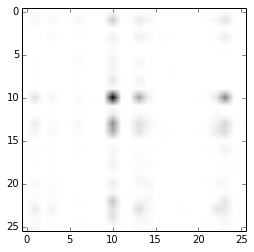

In [482]:
import matplotlib.pyplot as plt
conf = confusion_matrix(dev_test_labels,actual_predictions)
plt.imshow(conf, cmap='binary')

In [483]:
pd.crosstab(dev_test_labels, actual_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,ASSAULT,BURGLARY,DRUG/NARCOTIC,FRAUD,LARCENY/THEFT,MISSING PERSON,NON-CRIMINAL,OTHER OFFENSES,RECOVERED VEHICLE,ROBBERY,SECONDARY CODES,SEX OFFENSES FORCIBLE,SUSPICIOUS OCC,TRESPASS,VANDALISM,VEHICLE THEFT,WARRANTS,WEAPON LAWS,All
True,,,,,,,,,,,,,,,,,,,
ARSON,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,4
ASSAULT,5,4,5,0,27,1,10,6,0,0,0,0,0,1,5,14,1,0,79
BRIBERY,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
BURGLARY,0,3,1,0,10,0,8,4,0,1,0,0,0,0,2,10,0,0,39
DISORDERLY CONDUCT,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,2
DRIVING UNDER THE INFLUENCE,0,0,1,0,4,0,0,0,0,0,0,0,0,0,0,1,0,0,6
DRUG/NARCOTIC,1,0,3,0,7,0,6,0,0,0,0,0,0,0,0,0,0,0,17
DRUNKENNESS,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,5
FRAUD,1,0,1,0,12,0,7,0,0,0,0,0,0,0,0,0,0,0,21


##### Add time of day 

In [63]:
# Reload data 
train_raw = pd.read_csv('Data/train.csv')
test_raw = pd.read_csv('Data/test.csv')

In [64]:
def segment_time1(ts):
    ''' Segment time of day '''
    if ts.hour<=4: return 1
    elif ts.hour<=8: return 2
    elif ts.hour<=12: return 3
    elif ts.hour<=16: return 4
    elif ts.hour<=20: return 5
    elif ts.hour<=24: return 6
def segment_time2(ts):
    ''' Return only hour '''
    return ts.hour
def dayofmonth(ts):
    ''' Return day of month '''
    return ts.day
def yearofcrime(ts):
    ''' Return the year '''
    return ts.year

segment_time1 = np.vectorize(segment_time1,otypes=[np.int64])
segment_time2 = np.vectorize(segment_time2,otypes=[np.int64])
dayofmonth = np.vectorize(dayofmonth,otypes=[np.int64])
yearofcrime = np.vectorize(yearofcrime,otypes=[np.int64])

train_raw['Dates'] = pd.to_datetime(train_raw['Dates'])
test_raw['Dates'] = pd.to_datetime(test_raw['Dates'])

train_raw['DaySegment'] = train_raw['Dates'].apply(segment_time1)
test_raw['DaySegment'] = test_raw['Dates'].apply(segment_time1)

train_raw['TimeOfDay'] = train_raw['Dates'].apply(segment_time2)
test_raw['TimeOfDay'] = test_raw['Dates'].apply(segment_time2)

train_raw['DayOfMonth'] = train_raw['Dates'].apply(dayofmonth)
test_raw['DayOfMonth'] = test_raw['Dates'].apply(dayofmonth)

train_raw['Year'] = train_raw['Dates'].apply(yearofcrime)
test_raw['Year'] = test_raw['Dates'].apply(yearofcrime)

Creating a function here that can be reused across other tests when adding / removing features

In [65]:
# Run test on dev data
def analyze_impact(raw_data, old_fields, new_fields,\
                   label_field, s=10000, n=1, trees=10):
    ''' Iterate over many RF tries to 
        see how change impacts results 
    '''
    raw_data = raw_data.iloc[\
                    np.random.permutation(len(raw_data))]
    dev_data_old\
    ,dev_data_new\
    ,dev_labels = raw_data[old_fields][:s]\
                    ,raw_data[new_fields][:s]\
                    ,raw_data[label_field][:s]
    test_data_old\
    ,test_data_new\
    ,test_labels = raw_data[old_fields][s+1:s+5000]\
                    ,raw_data[new_fields][s+1:s+5000]\
                    ,raw_data[label_field][s+1:s+5000]
    
    old_accuracies = []
    new_accuracies = []
    def measure(d, t, n, out):
        for i in range(n):
            # Initialize empty model 
            rf = RandomForestClassifier(n_jobs=-1, n_estimators=trees) 

            # Recode 
            d = recode(d)
            t = recode(t)
            d_le = recode_labels(np.concatenate((\
                                                dev_labels\
                                                ,test_labels)\
                                                   ,axis=1))
            d_l = d_le.transform(dev_labels)
            t_l = d_le.transform(test_labels)

            # Fit model 
            rf.fit(d, d_l)

            # Predict 
            predictions = rf.predict(t)

            # Measure accuracy
            accuracy = np.sum((predictions == \
                               t_l)*1.0)/len(t_l)

            # add result 
            out.append(accuracy)
    
    measure(dev_data_old.copy(), test_data_old.copy(), n, old_accuracies)
    measure(dev_data_new.copy(), test_data_new.copy(), n, new_accuracies)
    m_old = np.mean(old_accuracies)
    s_old = np.std(old_accuracies)*1.0/np.sqrt(n)
    m_new = np.mean(new_accuracies)
    s_new = np.std(new_accuracies)*1.0/np.sqrt(n)
    print 'Old Accuracy: {0}% +/- {1}%\nNew Accuracy: {2}% +/- {3}%'\
        .format(round(m_old*100,2)
                ,round(1.96*s_old*100,2)
                ,round(m_new*100,2)
                ,round(1.96*s_new*100,2)
        )

In [69]:
import warnings
warnings.filterwarnings('ignore')

s = 100000 
old_fields = ['PdDistrict'\
              ]
new_fields = ['PdDistrict'\
              ,'TimeOfDay'\
             ]
nt = train_raw.copy()
analyze_impact(nt, old_fields, new_fields, \
               'Category', s, 1, 300)

Old Accuracy: 23.18% +/- 0.0%
New Accuracy: 23.46% +/- 0.0%


Test Notes:
* Adding time of day increased accuracy by ~2 percentage points, until I implemented random shuffling prior to testing - then the impact of adding time of day was negligable or only slightly positive in most trials. 
* Time of Day as an hour originally performed better than 4-hour blocks; however, after implementing random shuffling the day segment field performed better across multiple tries.
* Adding day of month reduced model performance due to overfitting. 
* Adding year reduced model performance due to overfitting. 
* Adding Address significantly reduces model accuracy due to overfitting
* Day of week significantly reduces model accuracy due to overfitting
* Lat/Lon significantly reduces model accuracy due to overfitting
* The actual expected accuracy is still very bad (<30%)

Other notes:
* This is a funny dataset because the only raw feature that works for prediction is Police District 
* It's a good example of how a model can easily be overfit with useless features
* The features provided are probably not enough to accurately predict category of crime; however, lat/lon is probably quite useful with some feature engineering so that it will generalize better

##### Add area of crime in place of lat/lon

Looking to test out a couple options for this feature. Currently, by using the exact location of the crime, the model does not generalize very well. A couple options are available: 1) utilize publicly available datasets on city neighborhoods to classify each event into a more generalized city segment, perhaps based on income levels, 2) use a clustering algorithm like K-means to segment the training data into clusters where there are crime "hotspots" and add one of these as a feature (replacing lat/lon and potentially address - will test the removal of features separately). 

I will first attempt #2 while looking for a good option for #1.

##### Get data from other sources

SF OpenData has a ton of supplemental data sources that will be great to try out for this effort.  

In [5]:
%matplotlib inline
from mpl_toolkits.basemap import Basemap, cm
import cartopy.io.shapereader as shpreader
import fiona
import numpy as np
import matplotlib.pyplot as plt
import pysal 
from pyproj import Proj
from pysal.cg.shapes import Point
from pysal.cg.locators import PolygonLocator, PointLocator, BruteForcePointLocator 
from pysal.cg.sphere import arcdist

In [70]:
# http://spatialreference.org/ref/epsg/2227/
p = Proj('+proj=lcc +init=EPSG:2227 +datum=NAD83 +units=us-ft +no_defs',preserve_units=True)
convert_vals = np.vectorize(lambda x,y: p(x,y))
convert_vals_inv = np.vectorize(lambda x,y: p(x,y,inverse=True))

In [71]:
shpfilename_elect = 'Data/SanFranciscoElectricityUse/SanFranciscoElectricityUse.shp'
shpfilename_school = 'Data/schools_public_pt/schools_public_pt.shp'
shpfilename_zoning = 'Data/Zoning/Zoning_Districts.shp'

##### Process shapefiles

In [72]:
# Convert lat/lon to coordinates that match shp
train_raw['New_X'], train_raw['New_Y'] = \
    convert_vals(train_raw['X'],train_raw['Y'])

In [73]:
def make_points(x):
    ''' Create list of Points objects
    '''
    out = []
    n = x.shape[0]
    for i in range(n):
        out.append(Point((x['New_X'][i],x['New_Y'][i])))
    return out
points = make_points(train_raw[['New_X','New_Y']])

In [74]:
shp = fiona.open(shpfilename_school)
n = len(shp)
SCHOOL_TYP,\
DEPT,\
FACILITY_N,\
DEPTNAME,\
FACILITY_I = \
    np.empty(n,dtype='|S25'),\
    np.empty(n,dtype='|S25'),\
    np.empty(n,dtype='|S25'),\
    np.empty(n,dtype='|S25'),\
    np.empty(n,dtype='|S25')
for i,s in enumerate(shp):
    SCHOOL_TYP[i] = s['properties']['SCHOOL_TYP']
    DEPT [i] = s['properties']['DEPT']
    FACILITY_N [i] = s['properties']['FACILITY_N']
    DEPTNAME [i] = s['properties']['DEPTNAME']
    FACILITY_I [i] = s['properties']['FACILITY_I']
shp.close()

props_df = pd.DataFrame({
        'Id':[i+1 for i in range(n)],
        'SCHOOL_TYP':SCHOOL_TYP
    })

In [30]:
set(props_df['SCHOOL_TYP'])

{'Charter School',
 'County School',
 'Early Education',
 'Elementary',
 'High School',
 'Middle School'}

In [31]:
hs = props_df[props_df['SCHOOL_TYP']=='High School']['Id']
cs = props_df[props_df['SCHOOL_TYP']=='County School']['Id']
chs = props_df[props_df['SCHOOL_TYP']=='Charter School']['Id']
ms = props_df[props_df['SCHOOL_TYP']=='Middle School']['Id']

In [35]:
def coord_search_schools():
    ''' Find nearest point and measure distance
        for every datapoint 
    '''
    shp = pysal.open(shpfilename_school,'r')
    pl_hs = BruteForcePointLocator([p for p in shp if p.id in hs])
    pl_cs = BruteForcePointLocator([p for p in shp if p.id in cs])
    pl_chs = BruteForcePointLocator([p for p in shp if p.id in chs])
    pl_ms = BruteForcePointLocator([p for p in shp if p.id in ms])
    shp.close()

    return_point_hs = lambda x: pl_hs.nearest(x)
    return_point_cs = lambda x: pl_cs.nearest(x)
    return_point_chs = lambda x: pl_chs.nearest(x)
    return_point_ms = lambda x: pl_ms.nearest(x)
    
    # point_ids = np.zeros(len(points),dtype=np.int8)
    point_distances_hs = np.zeros(len(points),dtype=np.float64)
    point_distances_cs = np.zeros(len(points),dtype=np.float64)
    point_distances_chs = np.zeros(len(points),dtype=np.float64)
    point_distances_ms = np.zeros(len(points),dtype=np.float64)
    
    def run_iters():
        for i,p in enumerate(points):
            if i%100000==0: print 'running {0} row'.format(i)
            pt_hs = return_point_hs(p)
            pt_cs = return_point_cs(p)
            pt_chs = return_point_chs(p)
            pt_ms = return_point_ms(p)
            
            point_distances_hs[i] = arcdist(p,pt_hs)
            point_distances_cs[i] = arcdist(p,pt_cs)
            point_distances_chs[i] = arcdist(p,pt_chs)
            point_distances_ms[i] = arcdist(p,pt_ms)

    run_iters()
    
    return point_distances_hs,\
            point_distances_cs,\
            point_distances_chs,\
            point_distances_ms

In [36]:
# This runs relatively quickly 
point_distances_hs,\
            point_distances_cs,\
            point_distances_chs,\
            point_distances_ms = coord_search_schools()

running 0 row
running 100000 row
running 200000 row
running 300000 row
running 400000 row
running 500000 row
running 600000 row
running 700000 row
running 800000 row


In [4]:
def run_iters_elect(plocator,return_poly_id):
    poly_ids = np.zeros(len(points),dtype=np.int8)
    for i,p in enumerate(points):
        if i%100000==0: print 'running {0} row'.format(i)
        poly_ids[i] = return_poly_id(plocator,p)
    # Save data because this step takes >5hrs to finish
    poly_ids_df = pd.DataFrame({'elect_poly_id':poly_ids})
    poly_ids_df.to_csv('Data/poly_ids.csv',index=False)

def run_iters_zoning(plocator,return_poly_id):
    poly_ids = np.zeros(len(points),dtype=np.int8)
    for i,p in enumerate(points):
        if i%1==100000: print 'running {0} row'.format(i)
        poly_ids[i] = return_poly_id(plocator,p)
    # Save data because this step takes >5hrs to finish
    poly_ids_df = pd.DataFrame({'zoning_id':poly_ids})
    poly_ids_df.to_csv('Data/zoning_ids.csv',index=False)

def return_poly_id(pl,x):
        ''' Find the polygon that 
            contains each point
        '''
        try:
            return pl.contains_point(x)[0].id
        except IndexError:
            return -1

def polygon_search(shpfilename,run_iters,\
                   return_poly_id=return_poly_id):
    ''' Iterate through shapefile polygons
        and find id of polgy for each datapoint
    '''
    shp = pysal.open(shpfilename,'r')
    pl = PolygonLocator([p for p in shp])
    shp.close()
    run_iters(pl,return_poly_id)

# polygon_search(shpfilename_elect,run_iters_elect)
# polygon_search(shpfilename_zoning,run_iters_zoning)

In [43]:
# only run this after ids are compiled
poly_ids_df_elect = pd.read_csv('Data/poly_ids.csv')

In [20]:
def run_iters(points, point_locator, centroids, \
              log_at=100000):
    ''' Iterate through points to find 
        the nearest centroid from shapefile
    '''
    point_fun = lambda x,pl: pl.nearest(x)
    id_fun = lambda p, centroids: [i for i,c in enumerate(centroids)\
                                  if c==p][0]
    nearest_ids = np.zeros(len(points),dtype=np.int64)
    for i,p in enumerate(points):
        if i%log_at==0: print 'running {0} row'.format(i)
        pt = point_fun(p,point_locator)
        pt_id = id_fun(pt, centroids)
        nearest_ids[i] = pt_id
    return nearest_ids

def save_file(array_to_save, colname, filename):
    ''' Write column to CSV '''
    array_to_save_df = pd.DataFrame({colname:array_to_save})
    array_to_save_df.to_csv(filename,index=False)

def coord_search(shpfile, points, \
                 run_iters_fun, \
                 locator_fun=BruteForcePointLocator):
    ''' Since polygon search is not efficient
        do a comparison to each centroid instead
    '''
    gather_centroids = lambda shp: [p.centroid for p in shp]

    # Read file
    shp = pysal.open(shpfile,'r')
    centroids = gather_centroids(shp)
    pl = locator_fun(centroids)
    shp.close()
    
    # Return the nearest points
    nearest_ids = run_iters_fun(points,pl,centroids)
    
    return nearest_ids

# zone_ids = coord_search(shpfilename_zoning,points,\
#                        run_iters)
# save_file(zone_ids, 'zoning_id', 'Data/zoning_ids.csv')

running 0 row
running 100000 row
running 200000 row
running 300000 row
running 400000 row
running 500000 row
running 600000 row
running 700000 row
running 800000 row


In [55]:
# only run this after zone ids are compiled
zone_ids = pd.read_csv('Data/zoning_ids.csv')

In [50]:
shp = fiona.open(shpfilename_zoning)
n = len(shp)
ZONING_SIM,\
DISTRICTNA = \
    np.empty(n,dtype='|S25'),\
    np.empty(n,dtype='|S25')
for i,s in enumerate(shp):
    ZONING_SIM[i] = s['properties']['ZONING_SIM']
    DISTRICTNA[i] = s['properties']['DISTRICTNA']
shp.close()

props_df_zoning = pd.DataFrame({
        'Id':[i+1 for i in range(n)],
        'ZONING_SIM':ZONING_SIM,
        'DISTRICTNA':DISTRICTNA
    })
all_zones = pd.merge(zone_ids,props_df_zoning,'left',\
                    left_on=['zoning_id'], right_on=['Id'])

In [51]:
shp = fiona.open(shpfilename_elect)
n = len(shp)
kWh_pC,\
kWh,\
Zip,\
Pop2010_zc = \
    np.empty(n,dtype=np.float64),\
    np.empty(n,dtype=np.float64),\
    np.empty(n,dtype='|S10'),\
    np.empty(n,dtype=np.int64)
for i,s in enumerate(shp):
    kWh_pC[i] = s['properties']['kWh_pC']
    kWh [i] = s['properties']['kWh']
    Zip [i] = s['properties']['Zip']
    Pop2010_zc [i] = s['properties']['Pop2010_zc']
shp.close()

props_df_elect = pd.DataFrame({
        'Id':[i+1 for i in range(n)],\
        'kWh_pC':kWh_pC,\
        'kWh':kWh,\
        'Zip':Zip,\
        'Pop2010_zc':Pop2010_zc\
    })
all_elects = pd.merge(poly_ids_df_elect, props_df_elect, 'left',\
                     left_on=['elect_poly_id'], right_on=['Id'])

##### Add new columns

In [75]:
elect_cols = ['kWh_pC','kWh','Zip','Pop2010_zc']
train_raw[elect_cols] = all_elects[elect_cols] 

In [76]:
school_nearby = np.vectorize(lambda x: True if x<=1000 else False)
train_raw['HS_DISTANCE'] = point_distances_hs
train_raw['CS_DISTANCE'] = point_distances_cs
train_raw['CHS_DISTANCE'] = point_distances_chs
train_raw['MS_DISTANCE'] = point_distances_ms
train_raw['HS_NEARBY'] = school_nearby(train_raw['HS_DISTANCE'])
train_raw['CS_NEARBY'] = school_nearby(train_raw['CS_DISTANCE'])
train_raw['CHS_NEARBY'] = school_nearby(train_raw['CHS_DISTANCE'])
train_raw['MS_NEARBY'] = school_nearby(train_raw['MS_DISTANCE'])

In [77]:
train_raw['ZONING_SIM'] = all_zones['ZONING_SIM']
train_raw['DISTRICT_NAME'] = all_zones['DISTRICTNA']
train_raw['ZONE_ID'] = all_zones['Id']

##### Analyse features

In [79]:
from sklearn.feature_selection import SelectKBest 
train_raw = train_raw.dropna()
new_fields = [
    'PdDistrict','DayOfWeek','DaySegment','TimeOfDay','DayOfMonth','Year',\
    'kWh_pC','kWh','Zip','Pop2010_zc',\
    'HS_DISTANCE','CS_DISTANCE','CHS_DISTANCE','MS_DISTANCE',\
    'HS_NEARBY','CS_NEARBY','CHS_NEARBY','MS_NEARBY',\
    'ZONING_SIM','DISTRICT_NAME','ZONE_ID'
]
dev_data, dev_labels = train_raw[new_fields],train_raw['Category']
X = recode(dev_data)
le = recode_labels(dev_labels)
y = le.transform(dev_labels)

In [84]:
k = SelectKBest()
k.fit(X,y)
scores = pd.DataFrame({'kscore':k.scores_,'colname':X.columns.values})
scores.sort(['kscore'],ascending=0)

,colname,kscore
0,PdDistrict,507.094357
5,Year,353.912748
3,TimeOfDay,216.560510
2,DaySegment,196.970845
7,kWh,140.500842
9,Pop2010_zc,129.294523
8,Zip,59.771979
1,DayOfWeek,48.568776
20,ZONE_ID,40.114905
18,ZONING_SIM,37.196826


#### Part 3 - Error Diagnosis